#Prepare a prediction model for whether the client has subscribed a term deposit or not.

In [4]:

import pandas as pd

In [5]:
ds = pd.read_csv('/content/bank-full.csv', sep = ';')
ds

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
ds['y/n'] = ds.pop('y') # Changing the column name for y

In [7]:
ds.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y/n          object
dtype: object

In [8]:
ds.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y/n             2
dtype: int64

In [9]:
ds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


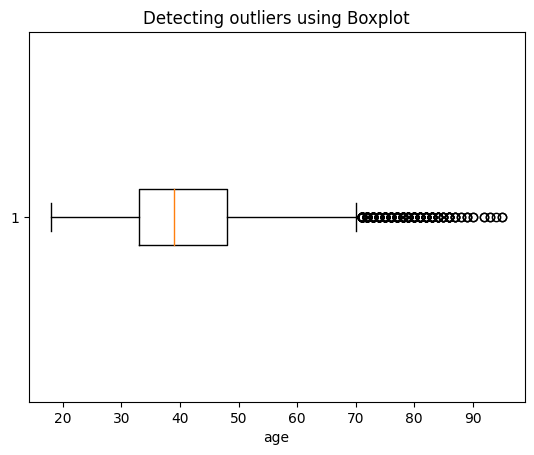

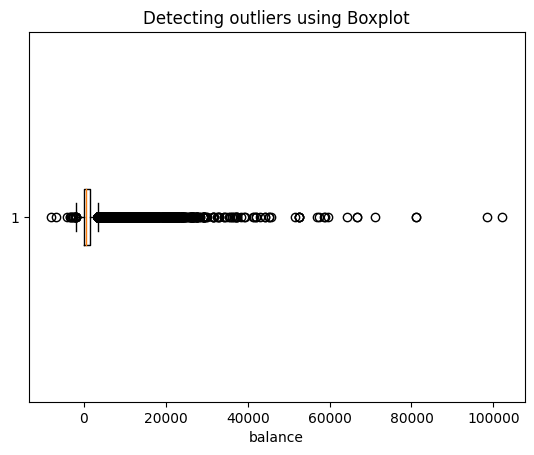

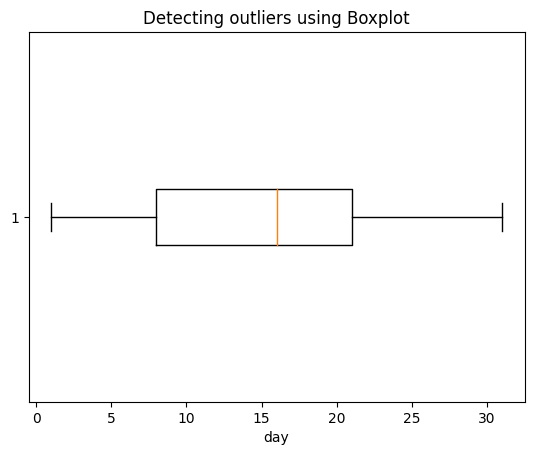

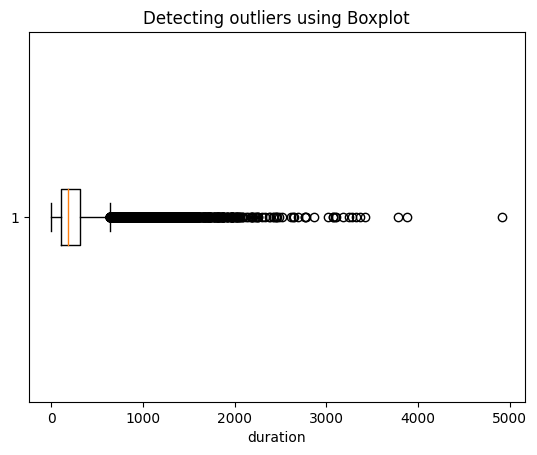

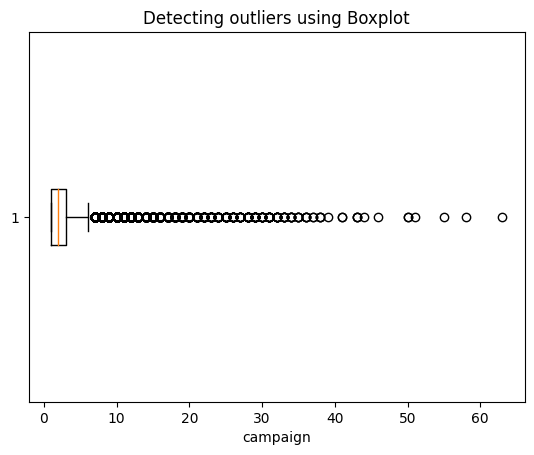

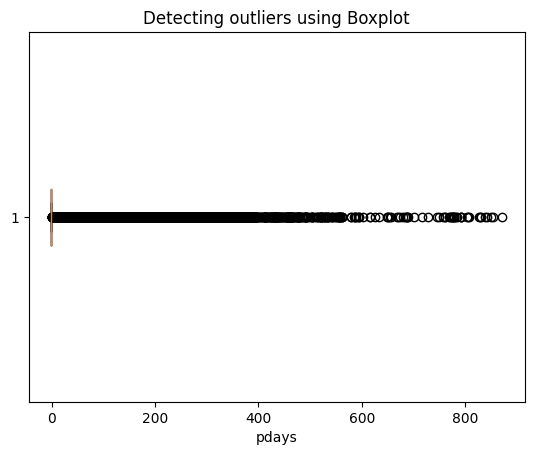

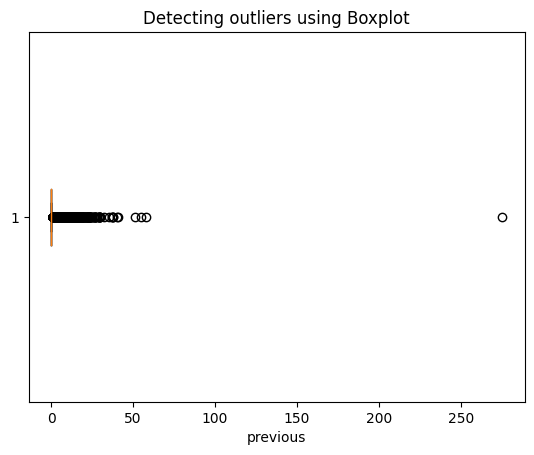

In [10]:

import matplotlib.pyplot as plt
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'int64' or dict(ds.dtypes)[i] ==  'float64':
  plt.boxplot(ds[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()


In [11]:
mappings = {}
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'O':
  mappings[i] = dict(zip(ds[i].unique(), range(len(ds[i].unique()))))
  ds[i] = ds[i].map(lambda x: mappings[i][x])
ds



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y/n
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


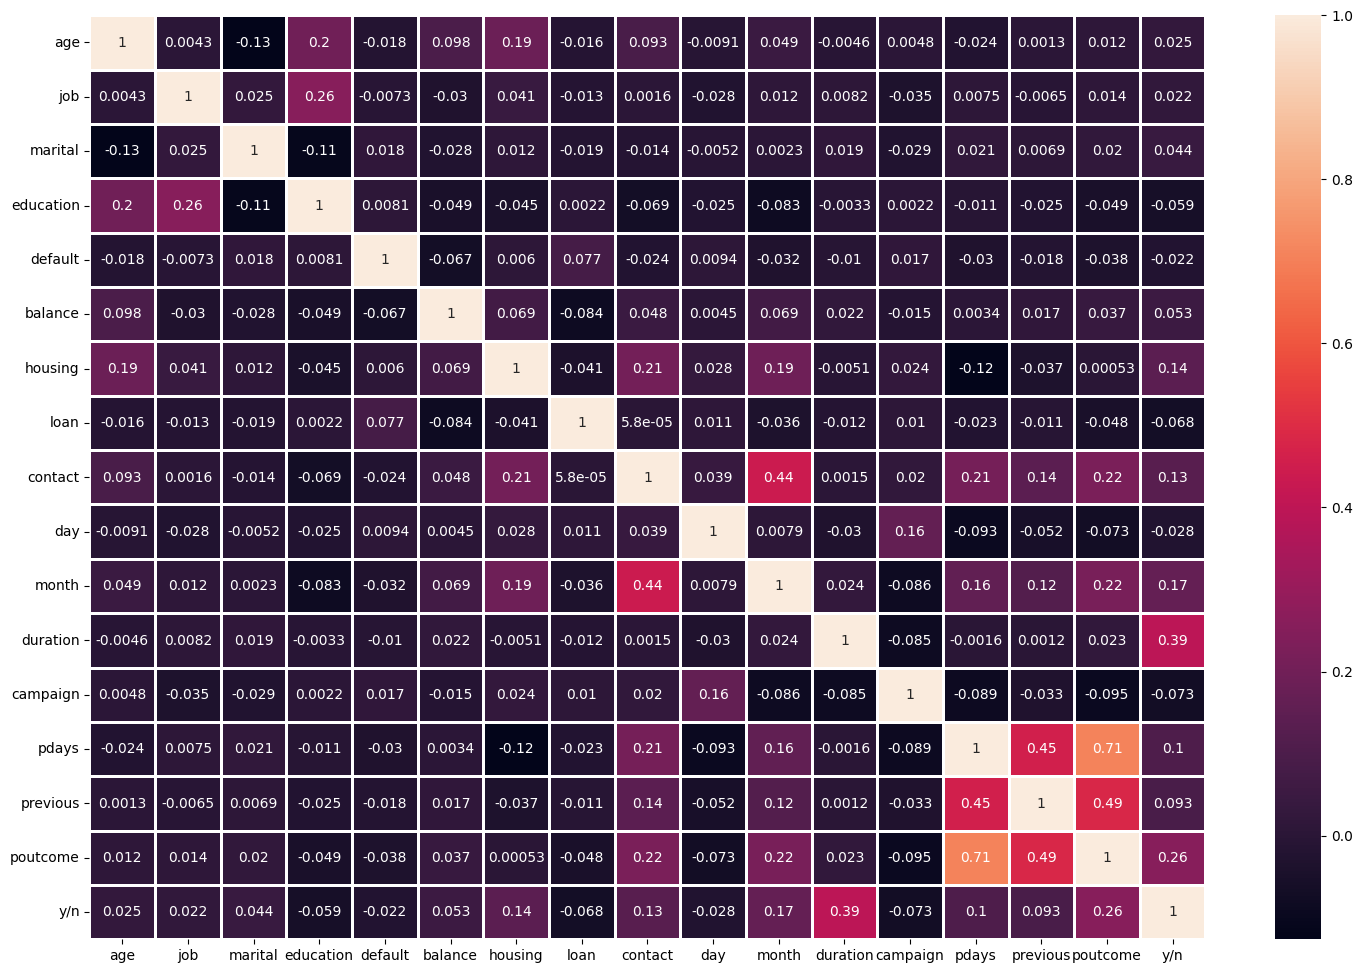

In [12]:
# Checking for the correlation

import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize = (18, 12))
corr = ds.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [13]:
# Assigning the variables

y = ds['y/n']
x = ds.drop('y/n', axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)



In [15]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

lrg = LogisticRegression()
lrg = lrg.fit(x_train,y_train)
pred = lrg.predict(x_test)


print('Accuracy: ', accuracy_score(y_test, pred))
print('\n classification report: \n' , classification_report(y_test, pred))
print('\n confussion matrix:\n', confusion_matrix(y_test, pred))


Accuracy:  0.8854362490324007

 classification report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043


 confussion matrix:
 [[7788  164]
 [ 872  219]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


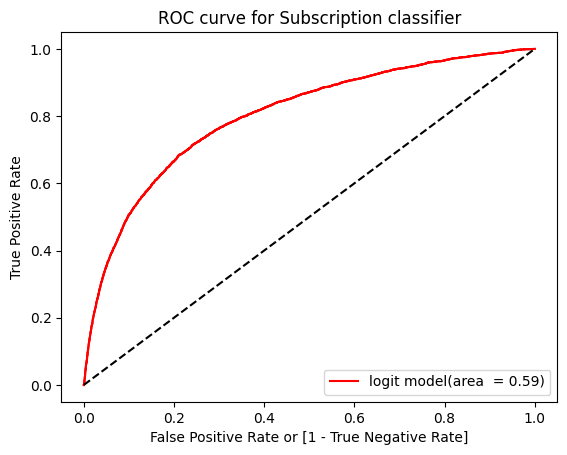

AUC-ROC Score: 0.5900547648862929


In [16]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr,tpr,thresholds=roc_curve(y,lrg.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print('AUC-ROC Score:',auc)